In [1]:
import pandas as pd
data = pd.read_csv('data_banknote_authentication.csv')
data.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [2]:
import pandas as pd
data = pd.read_csv('data_banknote_authentication.csv',names = ["variance of Wavelet Transformed image",
"Skewness of Wavelet Transformed image",
"Kurtosis of Wavelet Transformed image",
"Entropy of image",
"class"])
data.head()

,variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.dtypes

variance of Wavelet Transformed image    float64
Skewness of Wavelet Transformed image    float64
Kurtosis of Wavelet Transformed image    float64
Entropy of image                         float64
class                                      int64
dtype: object

In [4]:
data_input = data.drop(columns=['class'])
data_output = data['class']

In [5]:
data_input.head()

,variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [6]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [7]:
data_output.unique()
# 0 -> Authentic
# 1 -> Inauthentic

array([0, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(data_input,data_output,test_size=0.33,random_state=2)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.33,random_state=2)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(615, 4)
(615,)
(304, 4)
(304,)
(453, 4)
(453,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier(max_depth=2,random_state=2)

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)

In [15]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.9284552845528455
0.9013157894736842


In [16]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_acc_values = []
val_acc_values = []

for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_val = accuracy_score(y_val,y_pred_val)
    train_acc_values.append(acc_train)
    val_acc_values.append(acc_val)

In [17]:
train_acc_values


[0.8536585365853658,
 0.9284552845528455,
 0.9479674796747968,
 0.9739837398373984,
 0.9869918699186991,
 0.9951219512195122,
 1.0,
 1.0]

In [18]:
 val_acc_values

[0.8223684210526315,
 0.9013157894736842,
 0.9375,
 0.9605263157894737,
 0.9572368421052632,
 0.9671052631578947,
 0.9769736842105263,
 0.9769736842105263]

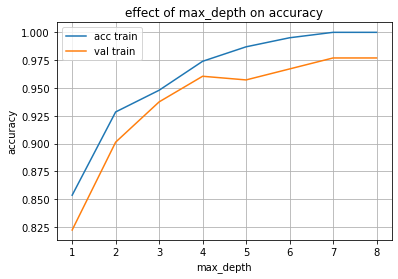

In [19]:
import matplotlib.pyplot as plt
plt.plot(max_depth_values,train_acc_values,label='acc train')
plt.plot(max_depth_values,val_acc_values,label='val train')
plt.legend()
plt.grid('both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('effect of max_depth on accuracy')
plt.show()

In [20]:
model_best = DecisionTreeClassifier(max_depth=3,random_state=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [21]:
y_pred_test = model_best.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.9315673289183223


In [22]:
import pickle
with open('saved-model','wb') as f:
    pickle.dump(model_best,f)

In [23]:
with open('saved-model','rb') as f:
    pickle.load(f)

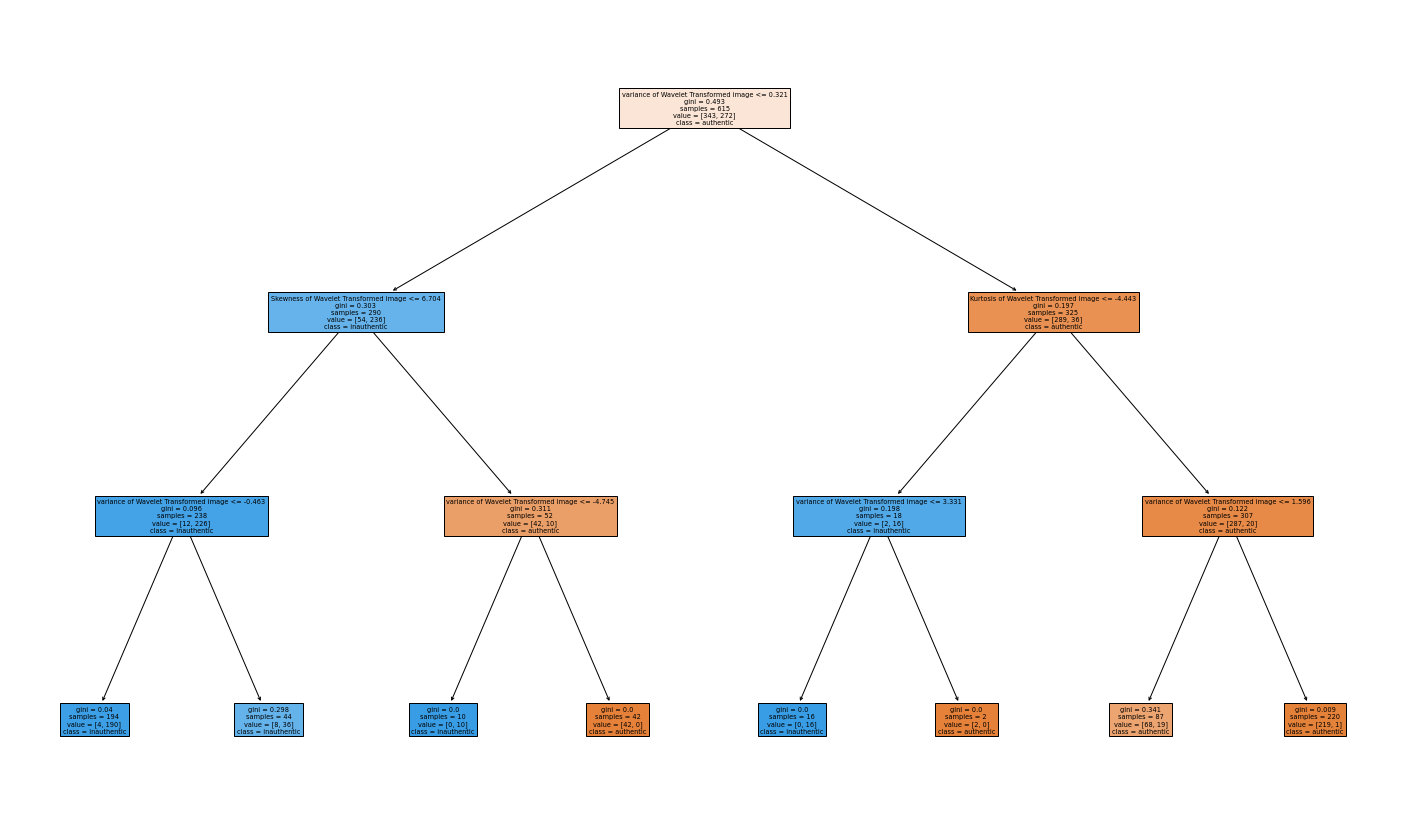

In [24]:
from sklearn import tree 
plt.figure(figsize=(25,15))
tree.plot_tree(model_best,feature_names = ["variance of Wavelet Transformed image",
"Skewness of Wavelet Transformed image",
"Kurtosis of Wavelet Transformed image",
"Entropy of image"
],class_names = ['authentic','inauthentic'],filled = True)
plt.show()

In [25]:
model_best.feature_importances_

array([0.71281689, 0.19517182, 0.09201129, 0.        ])

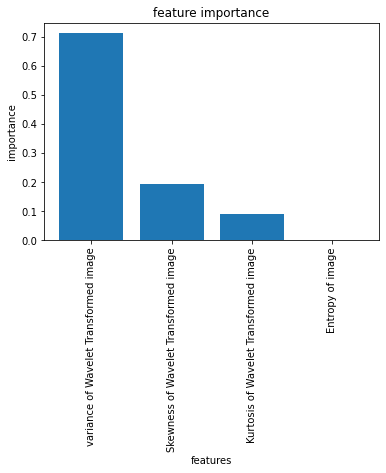

In [26]:
feature_names = ["variance of Wavelet Transformed image",
"Skewness of Wavelet Transformed image",
"Kurtosis of Wavelet Transformed image",
"Entropy of image"
]
plt.bar(feature_names,model_best.feature_importances_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('feature importance')
plt.show()

In [27]:
                              #Building a Predictive Model!



In [28]:
test_input_data = (1.1432,-3.7413,5.5777,-0.63578)
import numpy as np
test_input_data_arr = np.asarray(test_input_data)
test_input_data_reshaped = test_input_data_arr.reshape(1,-1)
prediction = model_best.predict(test_input_data_reshaped)
if prediction[0] == 0:
    print("Prediction is: Authentic Banknote")
else:
    print("Prediction is: Inauthentic Banknote")

Prediction is: Authentic Banknote
